In [8]:
import pandas as pd
#chargement des données (3 fichiers, rssi_0,rssi_1, rssi_2,et rssi_3
rss_0=pd.read_csv('RSS_0.csv')
rss_1=pd.read_csv('RSS_1.csv')
rss_2=pd.read_csv('RSS_2.csv')
rss_3=pd.read_csv('RSS_3.csv')


'\nrss_0=pd.DataFrame(rss_0)\nrss_1=pd.DataFrame(rss_1)\nrss_2=pd.DataFrame(rss_2)\nrss_3=pd.DataFrame(rss_3)\n'

In [119]:
#print("rss_0",rss_0.columns,rss_0.shape)
#print("rss_0",rss_0.head(),rss_0.describe(),rss_0.info())


In [ ]:
#print("rss_1",rss_1.columns,rss_1.shape)
#print("rss_1",rss_1.head(),rss_1.describe(),rss_1.info())


In [ ]:
#print("rss_2",rss_2.columns,rss_2.shape)
#print("rss_2",rss_2.head(),rss_2.describe(),rss_2.info())


In [ ]:
#print("rss_3",rss_3.columns,rss_3.shape)
#print("rss_3",rss_3.head(),rss_3.describe(),rss_3.info())

In [9]:
# Remplacer les valeurs manquantes par la moyenne des colonnes

rss_0.fillna(rss_0.mean(), inplace=True)
rss_1.fillna(rss_1.mean(), inplace=True)
rss_2.fillna(rss_2.mean(), inplace=True)
rss_3.fillna(rss_3.mean(), inplace=True)
rss_0 = rss_0.iloc[:, :-1]
rss_1 = rss_1.iloc[:, :-1]
rss_2 = rss_2.iloc[:, :-1]
rss_3 = rss_3.iloc[:, :-1]

# Vérification des valeurs manquantes après correction
print(rss_0.isnull().sum())
print(rss_1.isnull().sum())
print(rss_2.isnull().sum())
print(rss_3.isnull().sum())


NaN       0
NaN.1     0
NaN.2     0
NaN.3     0
NaN.4     0
NaN.5     0
NaN.6     0
NaN.7     0
NaN.8     0
NaN.9     0
NaN.10    0
NaN.11    0
NaN.12    0
NaN.13    0
NaN.14    0
NaN.15    0
NaN.16    0
NaN.17    0
NaN.18    0
NaN.19    0
NaN.20    0
NaN.21    0
NaN.22    0
NaN.23    0
NaN.24    0
NaN.25    0
NaN.26    0
NaN.27    0
NaN.28    0
NaN.29    0
NaN.30    0
NaN.31    0
NaN.32    0
NaN.33    0
NaN.34    0
NaN.35    0
NaN.36    0
NaN.37    0
NaN.38    0
NaN.39    0
NaN.40    0
NaN.41    0
NaN.42    0
NaN.43    0
NaN.44    0
NaN.45    0
NaN.46    0
NaN.47    0
NaN.48    0
NaN.49    0
dtype: int64
NaN       0
NaN.1     0
NaN.2     0
NaN.3     0
NaN.4     0
NaN.5     0
NaN.6     0
NaN.7     0
NaN.8     0
NaN.9     0
NaN.10    0
NaN.11    0
NaN.12    0
NaN.13    0
NaN.14    0
NaN.15    0
NaN.16    0
NaN.17    0
NaN.18    0
NaN.19    0
NaN.20    0
NaN.21    0
NaN.22    0
NaN.23    0
NaN.24    0
NaN.25    0
NaN.26    0
NaN.27    0
NaN.28    0
NaN.29    0
NaN.30    0
NaN.31    0
NaN

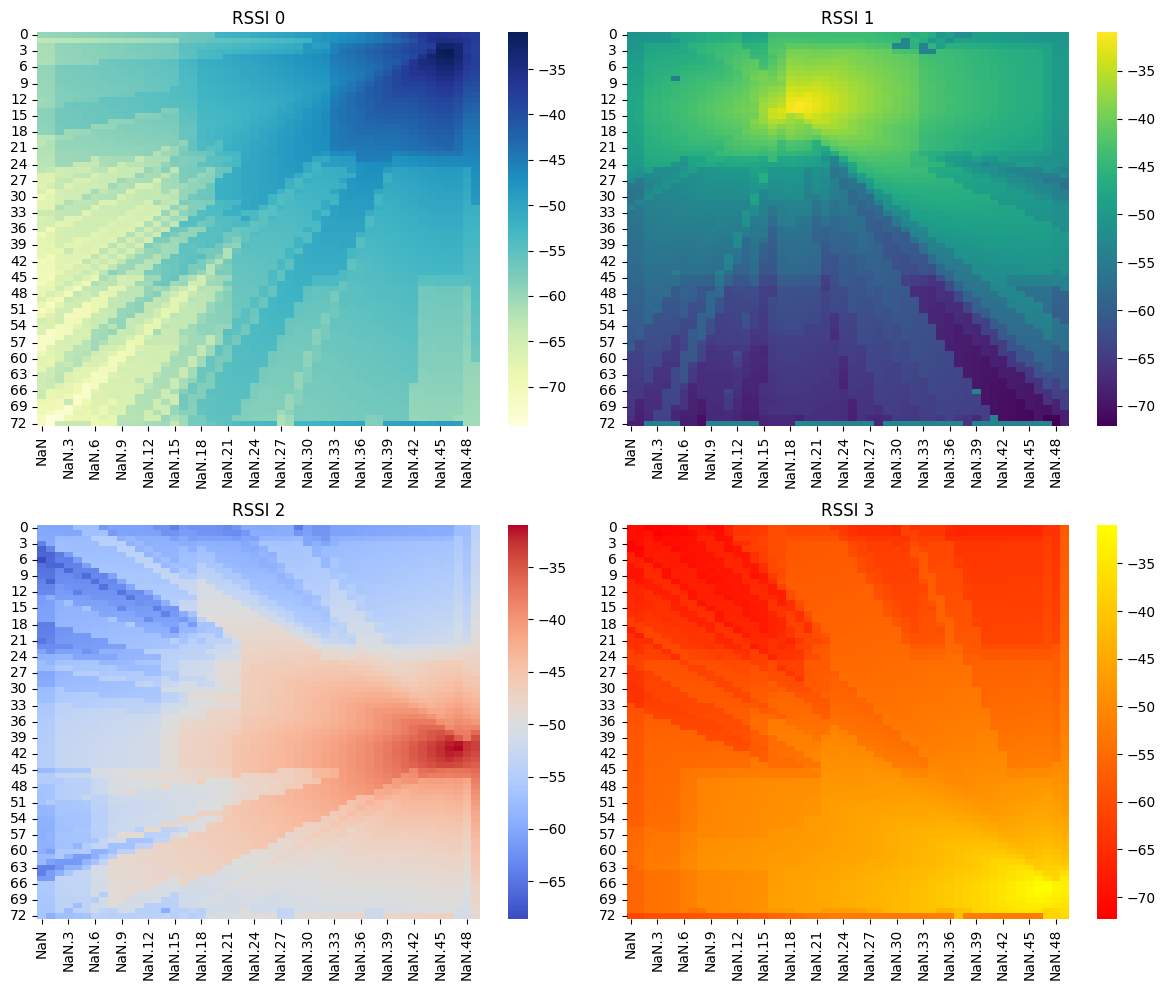

In [10]:
# Afficher les 4 cartes RSSI 

import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(rss_0, ax=axes[0, 0], cmap='YlGnBu')
axes[0, 0].set_title('RSSI 0')

sns.heatmap(rss_1, ax=axes[0, 1], cmap='viridis')
axes[0, 1].set_title('RSSI 1')

sns.heatmap(rss_2, ax=axes[1, 0], cmap='coolwarm')
axes[1, 0].set_title('RSSI 2')

sns.heatmap(rss_3, ax=axes[1, 1], cmap='autumn')
axes[1, 1].set_title('RSSI 3')

plt.tight_layout()
plt.show()


In [14]:
import numpy as np

def prepare_data(rssi_0, rssi_1, rssi_2, rssi_3):
    # Création d'une grille de coordonnées (x, y) pour les cibles
    grid_x, grid_y = np.meshgrid(range(rssi_0.shape[1]), range(rssi_0.shape[0]))
    
    # Ravel des cartes RSSI pour obtenir un vecteur de caractéristiques (X)
    features = np.stack([rssi_0.ravel(), rssi_1.ravel(), rssi_2.ravel(), rssi_3.ravel()], axis=1)
    
    # Ravel des coordonnées (x, y) comme cibles (Y)
    targets = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)
    
    return features, targets


In [15]:
# Conversion des cartes RSSI en données d'entraînement
X, Y = prepare_data(rss_0.to_numpy(), rss_1.to_numpy(), rss_2.to_numpy(), rss_3.to_numpy())
# Vérification des dimensions des données préparées

print("Dimensions des caractéristiques (X):", X.shape)
print("Dimensions des cibles (Y):", Y.shape)

Dimensions des caractéristiques (X): (3650, 4)
Dimensions des cibles (Y): (3650, 2)


In [16]:
import numpy as np
import pandas as pd

# Vérification des NaN dans X et Y
print("NaN dans X:", np.isnan(X).any())
print("NaN dans Y:", np.isnan(Y).any())

# Si des NaN sont présents, vous pouvez les supprimer ou les imputer
X_clean = X[~np.isnan(X).any(axis=1)]
Y_clean = Y[~np.isnan(Y).any(axis=1)]


NaN dans X: False
NaN dans Y: False


In [17]:
from sklearn.model_selection import train_test_split

# Division des données en entraînement (80%) et test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score
import numpy as np

# Construction du modèle
model = Sequential([
    Dense(64, activation='relu', input_dim=4),
    Dense(64, activation='relu'),
    Dense(2)  
])
model.summary()


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,610 (18.01 KB)

 Trainable params: 4,610 (18.01 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError()])

In [20]:
# Entraînement
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)
# Prédictions sur les ensembles d'entraînement et de test
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calcul du R² score sur l'ensemble d'entraînement et l'ensemble de test
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"R² score sur l'ensemble d'entraînement: {r2_train:.4f}")
print(f"R² score sur l'ensemble de test: {r2_test:.4f}")


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 479.8378 - root_mean_squared_error: 21.2357 - val_loss: 149.0247 - val_root_mean_squared_error: 12.2076
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 133.8422 - root_mean_squared_error: 11.5638 - val_loss: 107.2618 - val_root_mean_squared_error: 10.3567
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 110.6135 - root_mean_squared_error: 10.5152 - val_loss: 92.9572 - val_root_mean_squared_error: 9.6414
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 98.1867 - root_mean_squared_error: 9.9077 - val_loss: 85.3072 - val_root_mean_squared_error: 9.2362
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 93.5657 - root_mean_squared_error: 9.6715 - val_loss: 85.2715 - val_root_mean_squared_error: 9.2343
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.0770 - root_mean_squared_error: 9.4352 - val_loss: 83.8051 - val_root_mean_squared_error: 9.1545
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² score sur l'ensemble d'entraînement: 0.8058
R² score sur l'ensemble de test: 0.8142


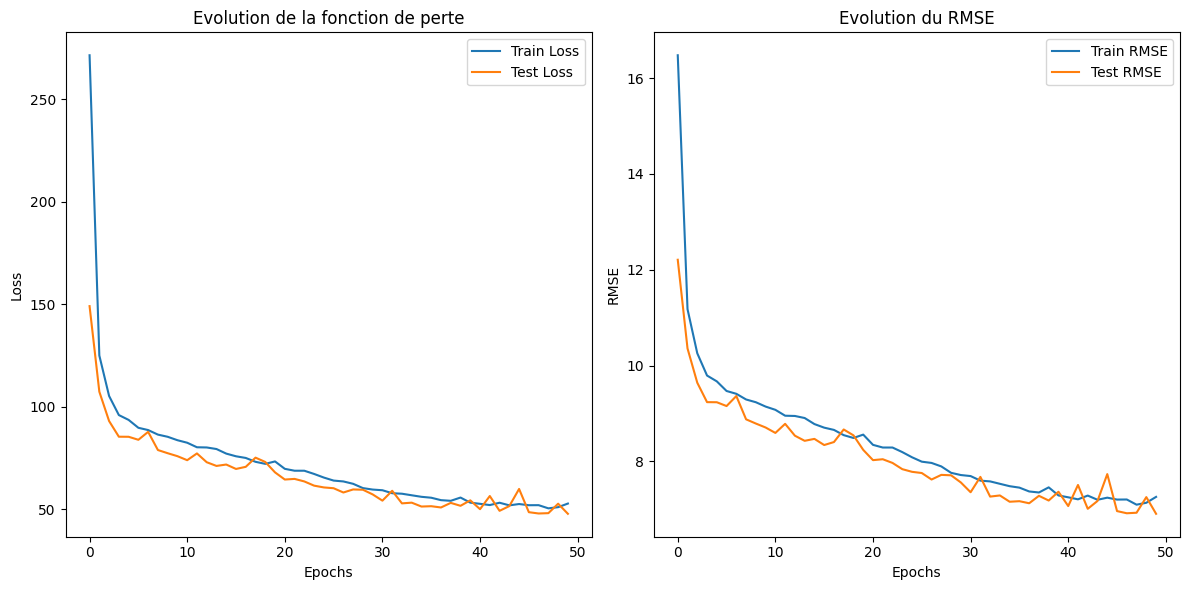

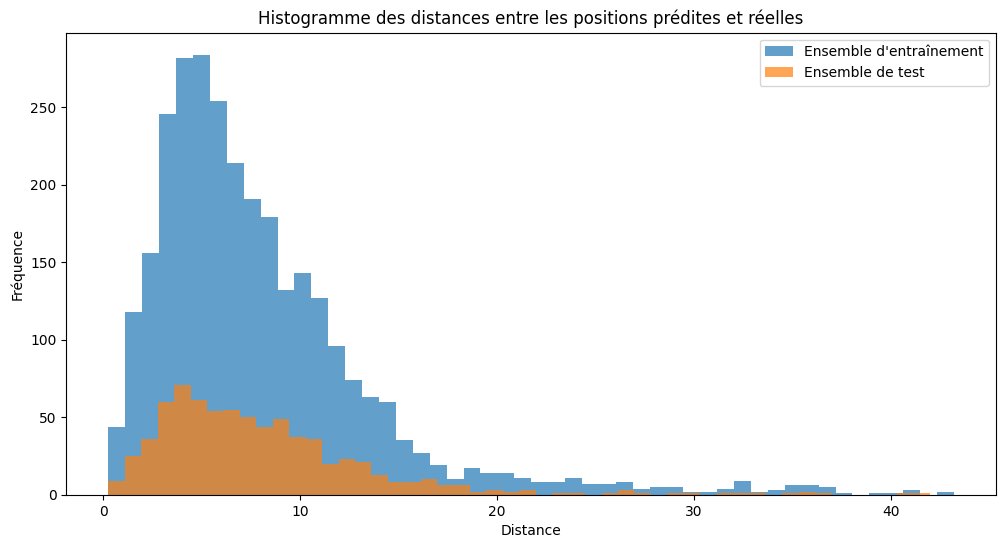

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Prédictions sur les ensembles d'entraînement et de test
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calcul du R² score sur l'ensemble d'entraînement et l'ensemble de test
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"R² score sur l'ensemble d'entraînement: {r2_train:.4f}")
print(f"R² score sur l'ensemble de test: {r2_test:.4f}")

# Tracer l'historique de la fonction de perte (Loss) et de la métrique RMSE
plt.figure(figsize=(12, 6))

# Fonction de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Evolution de la fonction de perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Test RMSE')
plt.title('Evolution du RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# Calcul des distances absolues entre les positions prédites et réelles
train_distances = np.linalg.norm(Y_train_pred - Y_train, axis=1)
test_distances = np.linalg.norm(Y_test_pred - Y_test, axis=1)

# Histogramme des distances pour l'ensemble d'entraînement
plt.figure(figsize=(12, 6))
plt.hist(train_distances, bins=50, alpha=0.7, label='Ensemble d\'entraînement')
plt.hist(test_distances, bins=50, alpha=0.7, label='Ensemble de test')
plt.title('Histogramme des distances entre les positions prédites et réelles')
plt.xlabel('Distance')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


In [ ]:
#Auteur IBRAHIM AMZA COULIBALY élève ingénieur mathématique appliquées et modélisation.